<div class="alert alert-block alert-danger">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>No aprobado</b><br/>
Aún falta practicamente todo el proyecto por ser completado, si tienes preguntas sobre como puedes continuar me puedes dejar un mensaje por aquí y con gusto te ayudaré a resolverlo, por otro lado si quisieras ayuda más personalizada puedes contactar a un tutor a través de Discord    
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>


# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np# importar librerías

In [2]:
orders = pd.read_csv('/datasets/instacart_orders.csv', sep = ';')
products = pd.read_csv('/datasets/products.csv', sep = ';')
aisles = pd.read_csv('/datasets/aisles.csv', sep = ';')
departments = pd.read_csv('/datasets/departments.csv', sep = ';')
orders_products = pd.read_csv('/datasets/order_products.csv', sep = ';')# leer conjuntos de datos en los DataFrames

In [3]:
orders.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
products.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
aisles.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
departments.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
orders_products.info(show_counts=True)# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto, buena manera de leer los datos y buenas observaciones iniciales.<br/>
</div>


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

<div class="alert alert-block alert-info">
<b>Conclusiones intermedias por conjunto de datos:<br>
    1. Orders.<br>
        Tiene 28,819 valores nulos en la columna "days_since_prior_order". Falta revisar los datos duplicados.<br>
    2. Products.<br>
        Tiene 1,258 valores nulos en la columna "product_name". Como hipótesis considero que hay nombres de productos que se asociaron/colocaron una vez y no volvieron a usarse.<br>
    3. Aisles.<br>
        La primera impresión es que todo está en orden en este conjunto de datos, pues al menos no hay valores nulos.<br>
    4. Departments.<br>
        Como con el conjunto anterior, al menos no hay valores nulos.<br>
    5. Orders_products.<br>
        Conjunto enorme de datos, sin embargo, destaca que sean 836 valores nulos en tan amplio conjunto. Dichos valores nulos se encuentran en la columna "add_to_cart_order", por lo que la hipótesis que tengo al respecto es que se tratan de órdenes no concretadas o canceladas.<br>
</b> <a class="tocSkip"></a>
</div>

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [8]:
print(orders.duplicated().sum())# Revisa si hay pedidos duplicados


15


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [9]:
duplicated_orders = orders[orders.duplicated()]
print(duplicated_orders)# Basándote en tus hallazgos,
orders_2am = orders[orders['order_hour_of_day'] == 2]
print(orders_2am)# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

¿Qué sugiere este resultado?

In [10]:
orders.drop_duplicates(inplace=True)# Elimina los pedidos duplicados


In [11]:
print(orders.duplicated().sum())# Vuelve a verificar si hay filas duplicadas


0


In [12]:
duplicated_order_ids = orders[orders['order_id'].duplicated()]
print(duplicated_order_ids.sum())# Vuelve a verificar si hay IDs duplicados de pedidos

order_id                  0.0
user_id                   0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho, los duplicados fueron eliminados correctamente
</div>


Describe brevemente tus hallazgos y lo que hiciste con ellos

### `products` data frame

In [13]:
products_duplicated_rows = products[products.duplicated()]
print(products_duplicated_rows)# Verifica si hay filas totalmente duplicadas


Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [14]:
products_duplicated_ids = products[products['product_id'].duplicated()]
print(products_duplicated_ids)# Verifica si hay IDs duplicadas de productos

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [15]:
products['product_name_upper'] = products['product_name'].str.upper()
duplicated_product_names = products[products['product_name_upper'].duplicated()]
print(duplicated_product_names[['product_id', 'product_name']])# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

       product_id                                     product_name
71             72                                              NaN
109           110                                              NaN
296           297                                              NaN
416           417                                              NaN
436           437                                              NaN
...           ...                                              ...
49689       49690                    HIGH PERFORMANCE ENERGY DRINK
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692       49693                           SPRING WATER BODY WASH
49693       49694                          BURRITO- STEAK & CHEESE

[1361 rows x 2 columns]


In [16]:
products_non_missing = products[~products['product_name_upper'].isnull()]
duplicated_product_names_non_missing = products_non_missing[products_non_missing['product_name_upper'].duplicated()]
print(duplicated_product_names_non_missing[['product_id', 'product_name_upper']])# Revisa si hay nombres duplicados de productos no faltantes


       product_id                               product_name_upper
2058         2059                                  BIOTIN 1000 MCG
5455         5456                 GREEN TEA WITH GINSENG AND HONEY
5558         5559                           CREAM OF MUSHROOM SOUP
7558         7559                        CINNAMON ROLLS WITH ICING
9037         9038                           AMERICAN CHEESE SLICES
...           ...                                              ...
49689       49690                    HIGH PERFORMANCE ENERGY DRINK
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692       49693                           SPRING WATER BODY WASH
49693       49694                          BURRITO- STEAK & CHEESE

[104 rows x 2 columns]


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `departments` data frame

In [17]:
departments_duplicated_rows = departments[departments.duplicated()]
print(departments_duplicated_rows)# Revisa si hay filas totalmente duplicadas

Empty DataFrame
Columns: [department_id, department]
Index: []


In [18]:
departments_duplicated_ids = departments[departments['department_id'].duplicated()]
print(departments_duplicated_ids)# Revisa si hay IDs duplicadas de productos

Empty DataFrame
Columns: [department_id, department]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `aisles` data frame

In [19]:
aisles_duplicated_rows = aisles[aisles.duplicated()]
print(aisles_duplicated_rows)# Revisa si hay filas totalmente duplicadas

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [20]:
aisles_duplicated_ids = aisles[aisles['aisle_id'].duplicated()]
print(aisles_duplicated_ids)# Revisa si hay IDs duplicadas de productos

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `order_products` data frame

In [21]:
order_products_duplicated_rows = orders_products[orders_products.duplicated()]
print(order_products_duplicated_rows)# Revisa si hay filas totalmente duplicadas

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [22]:
order_products_implicit_duplicates = orders_products.duplicated(subset=['order_id', 'product_id']).sum()
print(order_products_implicit_duplicates)# Vuelve a verificar si hay cualquier otro duplicado engañoso


0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
total_missing_product_names = products['product_name'].isna().sum()
print(total_missing_product_names)

missing_product_names = products[products['product_name_upper'].isna()]
print(missing_product_names[['product_id', 'product_name_upper']])
# Encuentra los valores ausentes en la columna 'product_name'

1258
       product_id product_name_upper
37             38                NaN
71             72                NaN
109           110                NaN
296           297                NaN
416           417                NaN
...           ...                ...
49552       49553                NaN
49574       49575                NaN
49640       49641                NaN
49663       49664                NaN
49668       49669                NaN

[1258 rows x 2 columns]


Describe brevemente cuáles son tus hallazgos.

In [24]:
missing_product_ID100 = (missing_product_names['aisle_id'] == 100).all()
print(f"¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?: {missing_product_ID100}")
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?


¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?: True


Describe brevemente cuáles son tus hallazgos.

In [25]:
missing_product_DEP21 = (missing_product_names['department_id'] == 21).all()
print(f"¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?: {missing_product_ID100}")
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?


¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?: True


Describe brevemente cuáles son tus hallazgos.

In [26]:
aisle_ID100 = aisles[aisles['aisle_id'] == 100]
print("Datos del pasillo con ID 100:")
print(aisle_ID100)
department_ID21 = departments[departments['department_id'] == 21]
print("\nDatos del departamento con ID 21:")
print(department_ID21)
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.


Datos del pasillo con ID 100:
    aisle_id    aisle
99       100  missing

Datos del departamento con ID 21:
    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.

In [27]:
products['product_name'].fillna('Unknown', inplace=True)
aisles['aisle'].fillna('Unknown', inplace=True)
departments['department'].fillna('Unknown', inplace=True)# Completa los nombres de productos ausentes con 'Unknown'


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `orders` data frame

In [28]:
orders_missing_values = orders.isna().sum()
print(orders_missing_values)# Encuentra los valores ausentes

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
non_first_orders = orders[orders['order_number'] != 1]
missing_values_non_first_orders = non_first_orders.isna().sum()
print(missing_values_non_first_orders)# ¿Hay algún valor ausente que no sea el primer pedido del cliente?


order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `order_products` data frame

In [30]:
ordersprod_missing_values = orders_products.isna().sum()
print(ordersprod_missing_values)# Encuentra los valores ausentes

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
min_add_to_cart_order = orders_products['add_to_cart_order'].min()
print(f"Valor mínimo: {min_add_to_cart_order}")
max_add_to_cart_order = orders_products['add_to_cart_order'].max()
print(f"Valor máximo: {max_add_to_cart_order}")
# ¿Cuáles son los valores mínimos y máximos en esta columna?


Valor mínimo: 1.0
Valor máximo: 64.0


Describe brevemente cuáles son tus hallazgos.

In [32]:
missing_add_to_cart_order_df = orders_products[orders_products['add_to_cart_order'].isna()]
missing_order_ids = missing_add_to_cart_order_df['order_id']
print(missing_order_ids)
#missing_order_ids.to_csv('/datasets/missing_add_to_cart_order_ids.csv', index=False)
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [33]:
grouped_missing_orders = missing_add_to_cart_order_df.groupby('order_id')['product_id'].count() # Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
min_product_count = grouped_missing_orders.min() # Agrupa todos los pedidos con datos ausentes por su ID de pedido.
print(f"¿Todos los pedidos con valores ausentes tienen más de 64 productos?: {min_product_count > 64}")# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?

¿Todos los pedidos con valores ausentes tienen más de 64 productos?: False


Describe brevemente cuáles son tus hallazgos.

In [34]:
orders_products['add_to_cart_order'].fillna(999, inplace=True) # Remplaza los valores ausentes en la columna 'add_to_cart' con 999 
orders_products['add_to_cart_order'] = orders_products['add_to_cart_order'].astype(int) #y convierte la columna al tipo entero.
orders_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
ok_order_hour_of_day = orders['order_hour_of_day'].between(0, 23).all()
print(f"¿Los valores en la columna 'order_hour_of_day' son razonables?: {ok_order_hour_of_day}")

¿Los valores en la columna 'order_hour_of_day' son razonables?: True


In [36]:
ok_order_dow = orders['order_dow'].between(0, 6).all()
print(f"¿Los valores en la columna 'order_dow' son razonables?: {ok_order_dow}")

¿Los valores en la columna 'order_dow' son razonables?: True


Escribe aquí tus conclusiones

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

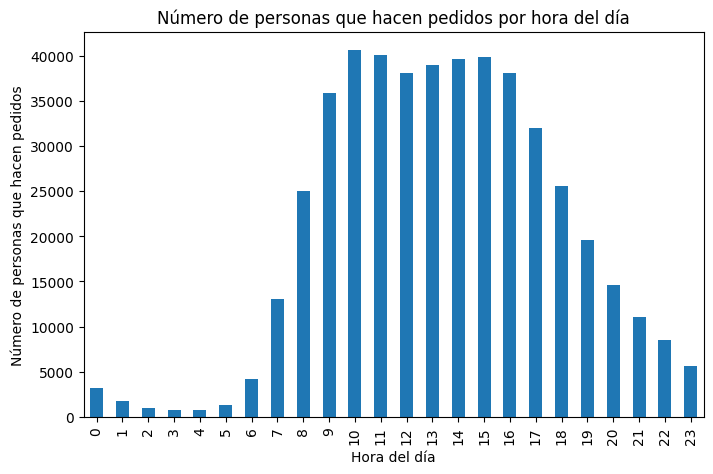

In [37]:
orders_per_hour = orders.groupby('order_hour_of_day').size() #Conteo
orders_per_hour.plot(kind='bar',
                    figsize=[8, 5],
                    title='Número de personas que hacen pedidos por hora del día', 
                    xlabel='Hora del día',
                    ylabel='Número de personas que hacen pedidos')
plt.show()

Escribe aquí tus conclusiones

### [A3] ¿Qué día de la semana compran víveres las personas?

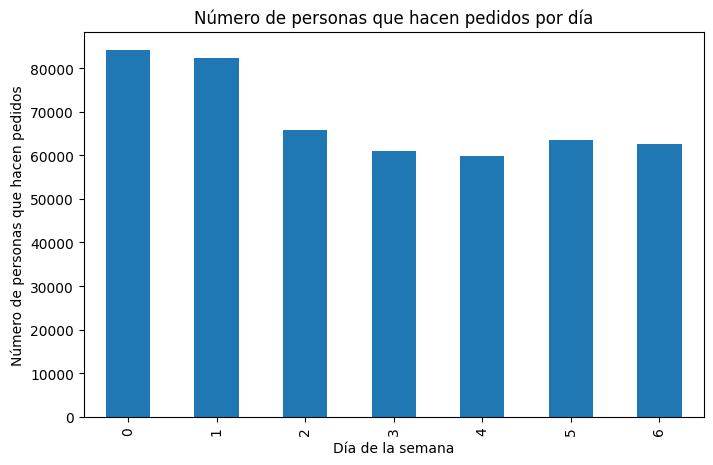

In [38]:
orders_per_day = orders.groupby('order_dow').size() #Conteo
orders_per_day.plot(kind='bar',
                    figsize=[8, 5],
                    title='Número de personas que hacen pedidos por día', 
                    xlabel='Día de la semana',
                    ylabel='Número de personas que hacen pedidos')
#plt.xticks(ticks=range(7), labels=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], rotation=0) 
#Cuando corrí los datos por primera vez no salía como tal el día de la semana, tuve que agregar la línea superior para mejorar la apariencia del gráfico, sin embargo, los datos no tienen el orden correcto puesto que no se el orden de origen, es decir, no conozco la equivalencia original
plt.show()

Escribe aquí tus conclusiones
<div class="alert alert-block alert-info">
<b>
    1. No es posible determinar exactamente el día de la semana porque no están asociados los númeoros a algún día<br>
    2. Podemos decir que los mejores días de venta son los primeros dos, posteriormente decaen<br>
</b> <a class="tocSkip"></a>
</div>

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

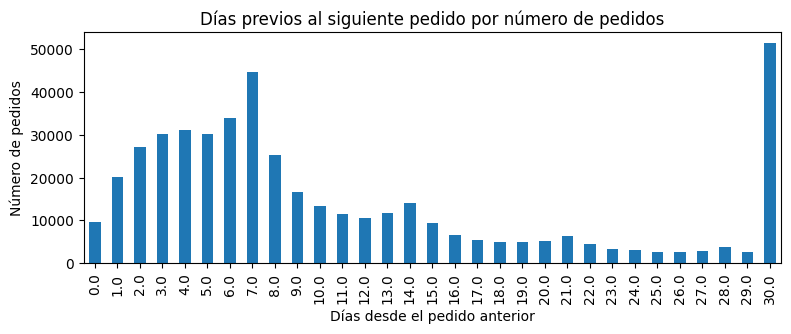

In [39]:
days_since_orders = orders.groupby('days_since_prior_order').size()
days_since_orders.plot(kind='bar',
                       figsize=[9, 3],
                       title='Días previos al siguiente pedido por número de pedidos',
                       xlabel='Días desde el pedido anterior',
                       ylabel='Número de pedidos')
plt.show()
#min_days_order = orders['days_since_prior_order'].min()
#print(f"El valor mínimo de días desde el pedido anterior es: {min_days_order}")
#max_days_order = orders['days_since_prior_order'].max()
#print(f"El valor máximo de días desde el pedido anterior es: {max_days_order}")

Escribe aquí tus conclusiones

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
# NOTA: Para esta pregunta considero una semana que inicia en lunes (order_dow == 0), quedo atento a confirmar dicha suposición
# 1. Filtrar los pedidos de los miércoles (order_dow == 2) y sábados (order_dow == 5)
w_orders = orders[orders['order_dow'] == 2]
s_orders = orders[orders['order_dow'] == 5]
#df[df['male'] == 1]['height'].plot(kind='hist', bins=30)

In [41]:
# 2. Se cuentan cuántas personas hacen órdenes para cada hora del día los miércoles y sábado respectivamente:
w_orders_per_hour = w_orders.groupby('order_hour_of_day').size()
s_orders_per_hour = s_orders.groupby('order_hour_of_day').size()

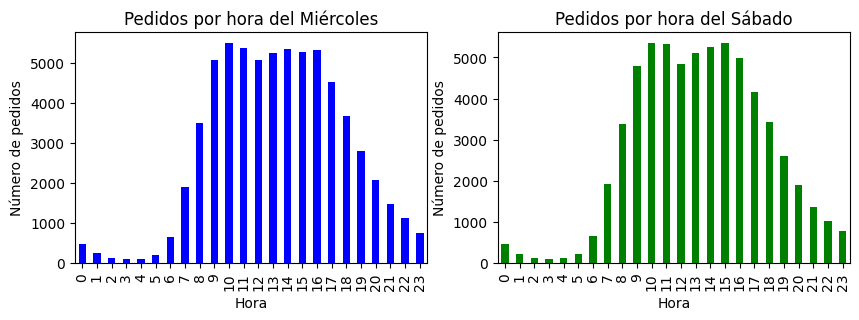

In [52]:
# Gráfico para los miércoles
plt.subplot(1, 2, 1)
w_orders_per_hour.plot(kind='bar',
                       figsize=[10,3],
                       color='blue',
                       title='Pedidos por hora del Miércoles',
                       xlabel='Hora',
                       ylabel='Número de pedidos',
                       )
# Gráfico para los sábados
plt.subplot(1, 2, 2)
s_orders_per_hour.plot(kind='bar', 
                       color='green',
                       xlabel='Hora',
                       ylabel='Número de pedidos',
                       title='Pedidos por hora del Sábado',
                       figsize=[10,3])
plt.show()

In [51]:
print("Diferencias observadas entre las distribuciones 'order_hour_of_day' de los miércoles y los sábados:")
print("1. Los miércoles, el número de pedidos tiende a ser más alto durante las horas laborales (8 AM a 5 PM).")
print("2. Los sábados, el número de pedidos tiende a ser más alto durante las horas de la mañana y la tarde (9 AM a 6 PM).")
print("3. Los sábados, hay un pico notable en el número de pedidos alrededor del mediodía (12 PM).")

Diferencias observadas entre las distribuciones 'order_hour_of_day' de los miércoles y los sábados:
1. Los miércoles, el número de pedidos tiende a ser más alto durante las horas laborales (8 AM a 5 PM).
2. Los sábados, el número de pedidos tiende a ser más alto durante las horas de la mañana y la tarde (9 AM a 6 PM).
3. Los sábados, hay un pico notable en el número de pedidos alrededor del mediodía (12 PM).


Escribe aquí tus conclusiones

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

Escribe aquí tus conclusiones

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

Escribe aquí tus conclusiones

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

Escribe aquí tus conclusiones

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

Escribe aquí tus conclusiones

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

Escribe aquí tus conclusiones

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

Escribe aquí tus conclusiones

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

Escribe aquí tus conclusiones

### Conclusion general del proyecto: